# Przepływ potencjalny

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

sns.set(font="Times New Roman")
sns.set_context("paper", font_scale=1.2)

In [ ]:
dx,dy = 1,1
M,N = 201,101
phi = np.zeros((N,M))
u0 = 1

x = np.arange(1,M+1,dx)
y = np.arange(50,N+50,dy)

def poisson():
  for i in range(1,M-1):
    for j in range(1,N-1):
      if(not ( ( x[i] >= 95 and x[i] <= 105 ) and ( y[j] <= 70 ) )):
        phi[j,i] = (phi[j+1,i] + phi[j-1,i] + phi[j,i+1] + phi[j,i-1]) / 4

  
for i in range(M):
  for j in range(N):
    if ( y[j] == y[-1] ):
      phi[j,i] = u0 * y[j]

    if (y[j]< 201 and x[i] ==x[0] or y[j]<201 and x[i] == x[-1]):
      phi[j,i] = u0 * y[j]

    if ( x[i] > 1 and x[i] < 201 and y[j] == 50):
      phi[j,i] = phi[0,0]

    if ( (x[i] > 95 and x[i] < 105) and 30 < y[j] < 70 ):
      phi[j,i] = 0

    if (x[i] == 95 and y[j] < 70 or x[i] == 105 and y[j] < 70 or 95 <= x[i] <= 105 and y[j] == 70):
      phi[j,i] = phi[0,0]	

def Symulacja():
  for i in range(10000):
    poisson()

In [ ]:
Symulacja()

Text(0.5, 1.0, 'Funkcja strumienia')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


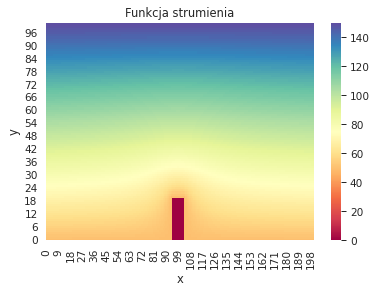

In [ ]:
ax = sns.heatmap(phi,cmap ='Spectral')
ax.invert_yaxis()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Funkcja strumienia")

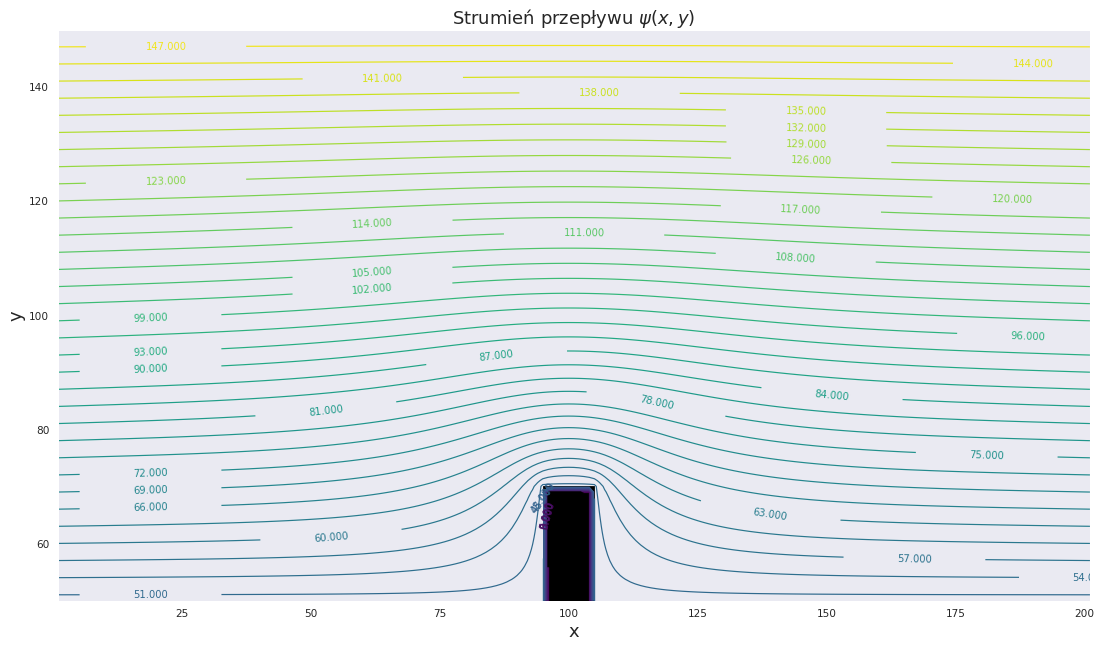

In [ ]:
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots()

C = ax.contour(X, Y, phi,50, cmap = 'viridis')
ax.clabel(C, inline=1, fontsize=10)
ax.fill_between([95,105],50,70, color = 'black')
ax.grid()
ax.set(ylabel = 'y', xlabel = 'x', title = 'Linie strumienia cieczy  $\psi(x,y)$')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.title.set_size(18)
ax.get_figure().set_size_inches(18.5, 10.5, forward = True)

plt.show()

In [ ]:

V = np.zeros((N,M))

u0 = 1

x = np.arange(1,M+1,dx)
y = np.arange(50,N+50,dy)

def poisson2():
  for i in range(1,M-1):
    for j in range(1,N-1):
      if(not ( ( x[i] >= 95 and x[i] <= 105 ) and ( y[j] <= 70 ) )):
        V[j,i] = (V[j+1,i] + V[j-1,i] + V[j,i+1] + V[j,i-1]) / 4
  war_brzeg_Vi()

def war_brzeg_V():
  for i in range(M):
    for j in range(N):
      V[j,i] = u0 * x[i]
      
  for i in range(M):
    for j in range(N):
      if y[j] == y[-1]:
        V[j,i] = u0 * x[i]

      if y[j]< 201 and x[i] == x[0]:
         V[i,j] = u0

      if y[j]<201 and x[i] == x[-1]:
        V[j,i]= u0 *x[-1]

      if y[j] == 50 and (1 < x[i] < 95 or 105 < x[i]):
        V[0,i] = V[1,i]

      if (x[i] == 95 or x[i] == 105) and 50 < y[j] <= 70:
        V[j,94] = V[j,93]
        V[j,104] = V[j,105]

      if y[j] == 70 and 95 <= x[i] < 105:
          V[20,i] = V[21,i]

      if 30<y[j]<70 and 90 < x[i] <105:
        V[j,i] = 0
        
      V[20][94] = (V[20][93] + V[21][94])/2
      V[20][104] = (V[20][105] + V[21][104])/2

def war_brzeg_Vi():
  for i in range(M):
    for j in range(N):

      if y[j] == 50 and (1 < x[i] < 95 or 105 < x[i]):
        V[0,i] = V[1,i]

      if (x[i] == 95 or x[i] == 105) and 50 < y[j] <= 70:
        V[j,94] = V[j,93]
        V[j,104] = V[j,105]

      if y[j] == 70 and 95 <= x[i] < 105:
          V[20,i] = V[21,i]

      V[20][94] = (V[20][93] + V[21][94])/2
      V[20][104] = (V[20][105] + V[21][104])/2


In [ ]:

def Symulacja2():
  for i in range(10000):
    poisson2()

In [ ]:
war_brzeg_V()
Symulacja2()

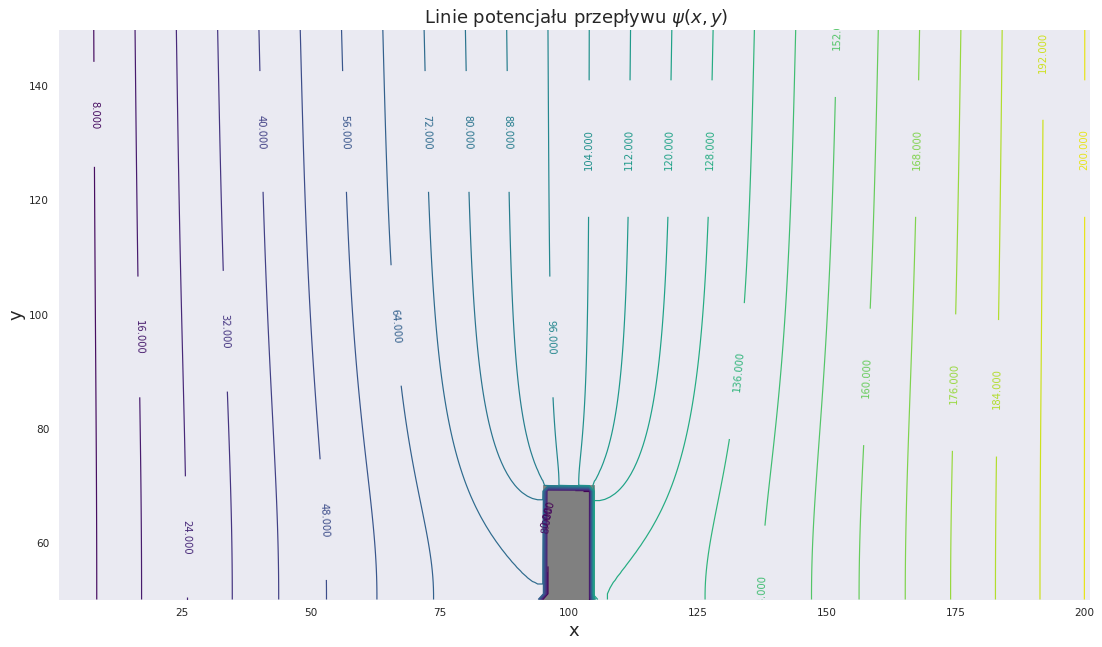

In [ ]:
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots()

C = ax.contour(X, Y, V,25, cmap = 'viridis')
ax.clabel(C, inline=1, fontsize=10)
ax.fill_between([95,105],50,70, color = 'gray')
ax.grid()
ax.set(ylabel = 'y', xlabel = 'x', title = ' Linie potencjału przepływu $\psi(x,y)$')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.title.set_size(18)
ax.get_figure().set_size_inches(18.5, 10.5, forward = True)
plt.show()

Text(0.5, 1.0, 'Potencjał przepływu')

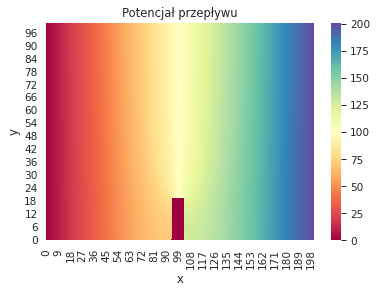

In [ ]:
ax = sns.heatmap(V,cmap='Spectral')
ax.invert_yaxis()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Potencjał przepływu")

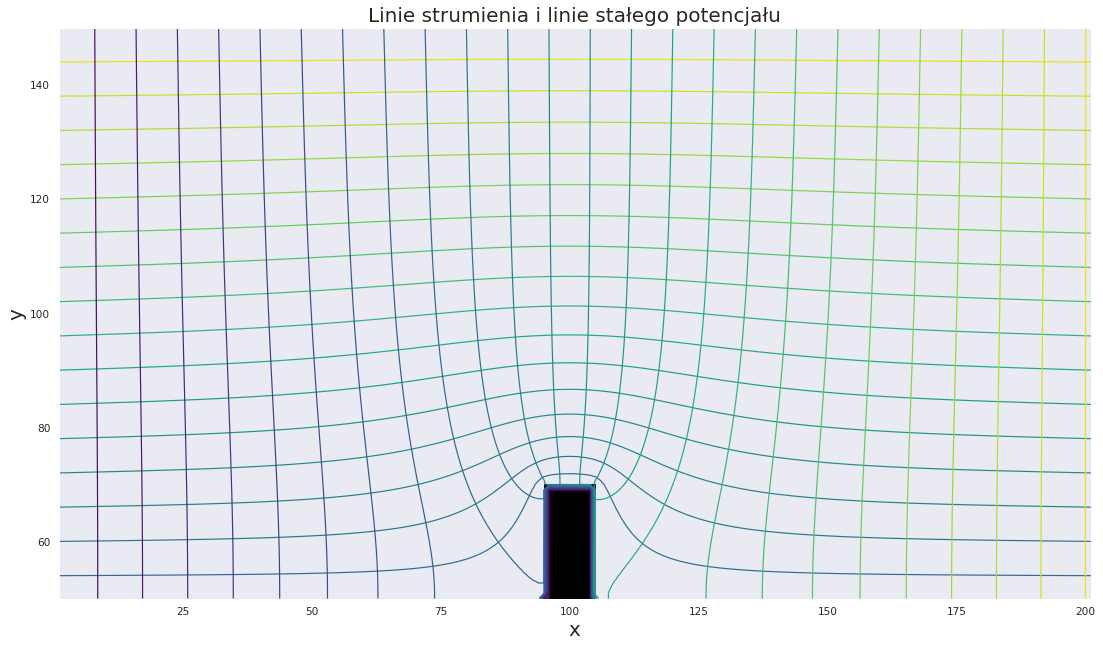

In [ ]:
fig = plt.figure(figsize=(18.5, 10.5))
plt.contour(X,Y,phi,25, cmap = 'viridis')
plt.contour(X,Y,V,25, cmap = 'viridis')
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.grid()
plt.title('Linie strumienia i linie stałego potencjału',fontsize=20)
plt.fill_between([95,105],50,70, color = 'black')
plt.savefig("sum.png")
plt.show()

